# Spectractor tutorial

The goal of this notebook is to demonstrate the capabilities of the Spectractor pipeline (still under construction). This pipeline is designed to extract a spectrum from an image given the coordinate (in pixels) of the object.

## Import the pipeline

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")
from spectractor import *

## Basic use

The basic use of the pipeline consists first to define: 
- the path to the fits image from which to extract the image, 
- the path of the output directory to save the extracted spectrum (created automatically if does not exist yet),
- the rough position of the object in the image,
- optionally the name of the target (to search for the extra-atmospheric spectrum if available).

In [2]:
filename="./fits/trim_20170605_007.fits"
output_directory="./outputs/"
guess = [745,643]
target="3C273"

Then the spectrum is simply extracted from the image and saved in a new fits file using the command:

In [3]:
Spectractor(filename,output_directory,guess,target)

Loading target 3C273 from NED...


2018-03-09 11:55:47  Spectrum   calibrate            WARNING 
	Manual settings for tests


## Advanced use

### Verbose and debug modes

The default usage of the Spectractor function only prints warning on the screen. The format of the logging message gives first the time of execution, the class involved, the class method involved, the logging level, and a message.

To show more details on the process followed by Spectractor, simply set VERBOSE variable to True. This also permit to plot the output spectrum on the screen:

2018-03-09 11:56:07  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-09 11:56:07  Image      load                 INFO   
	Loading image ./fits/trim_20170605_007.fits...
2018-03-09 11:56:07  Image      load                 INFO   
	Image loaded
2018-03-09 11:56:07  Image      load                 INFO   
	Loading disperser Thor300...
2018-03-09 11:56:07  spectractor Spectractor          INFO   
	Search for the target in the image...


Load disperser Thor300:
	from ../../common_tools/data/Thor300
Grating characteristics:
	N = 299.51 +/- 0.99 grooves/mm
	Average tilt of -0.6 degrees
MAIN_ID       RA           DEC      RA_PREC ... SP_TYPE_2 SP_QUAL_2 SP_BIBCODE_2
           "h:m:s"       "d:m:s"            ...                                 
------- ------------- ------------- ------- ... --------- --------- ------------
 3C 273 12 29 06.6951 +02 03 08.662       9 ...                                 
Loading target 3C273 from NED...


2018-03-09 11:56:08  Image      find_target          INFO   
	X,Y target position in pixels: 747.340,653.093
2018-03-09 11:56:08  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.79 degree
2018-03-09 11:56:09  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-03-09 11:56:10  Image      find_target          INFO   
	X,Y target position in pixels: 766.522,663.101
2018-03-09 11:56:10  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-09 11:56:10  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-03-09 11:56:10  Spectrum   calibrate            WARNING 
	Manual settings for tests
2018-03-09 11:56:10  Spectrum   calibrate            INFO   
	Calibrating order 1 spectrum...
2018-03-09 11:57:21  Spectrum   calibrate            INFO   
	Wavelenght total shift: 0.85nm (after 27 steps)
	with D = 

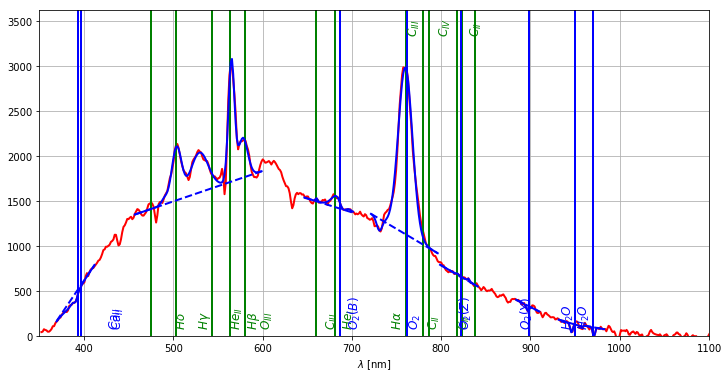

2018-03-09 11:57:24  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./outputs/trim_20170605_007_spectrum.fits


In [4]:
parameters.VERBOSE=True
Spectractor(filename,output_directory,guess,target)

In case of a suspected bug, user can enter the DEBUG mode, that gives more plots and outputs to check where the code may do something wrong. Note that VERBOSE mode is included in the DEBUG mode.

2018-03-09 11:57:24  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-09 11:57:24  Image      load                 INFO   
	Loading image ./fits/trim_20170605_007.fits...
2018-03-09 11:57:24  Image      load                 INFO   
	Image loaded
2018-03-09 11:57:24  Image      load                 INFO   
	Loading disperser Thor300...
2018-03-09 11:57:24  spectractor Spectractor          INFO   
	Search for the target in the image...


Load disperser Thor300:
	from ../../common_tools/data/Thor300
Grating characteristics:
	N = 299.51 +/- 0.99 grooves/mm
	Average tilt of -0.6 degrees
MAIN_ID       RA           DEC      RA_PREC ... SP_TYPE_3 SP_QUAL_3 SP_BIBCODE_3
           "h:m:s"       "d:m:s"            ...                                 
------- ------------- ------------- ------- ... --------- --------- ------------
 3C 273 12 29 06.6951 +02 03 08.662       9 ...                                 
Loading target 3C273 from NED...


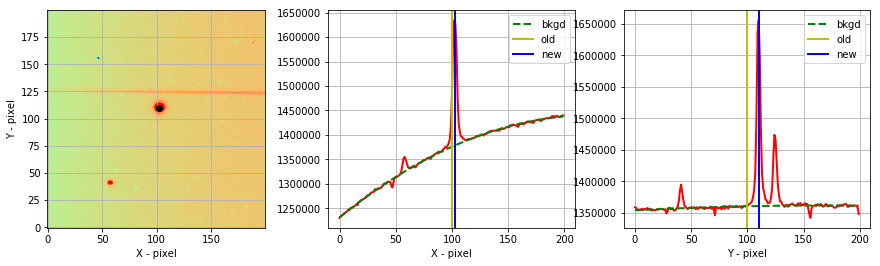

2018-03-09 11:57:26  Image      find_target          INFO   
	X,Y target position in pixels: 747.340,653.093


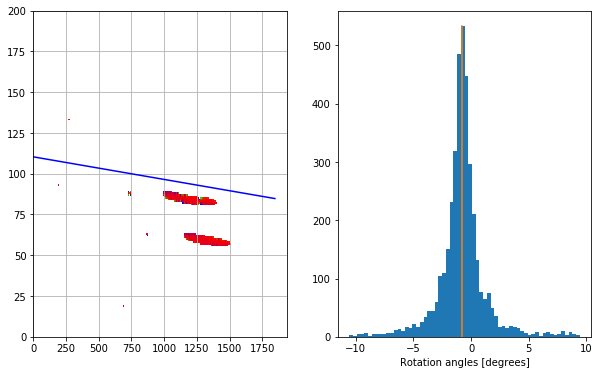

2018-03-09 11:57:26  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.79 degree


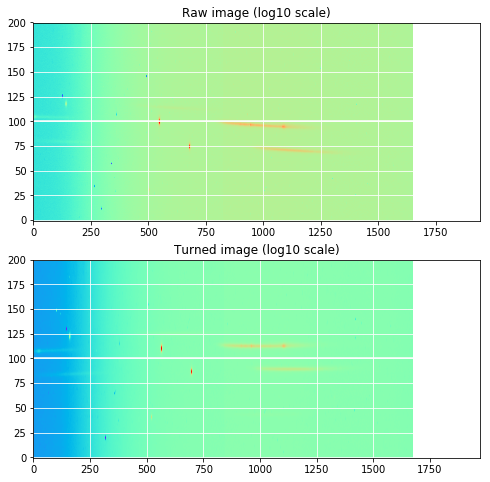

2018-03-09 11:57:28  spectractor Spectractor          INFO   
	Search for the target in the rotated image...


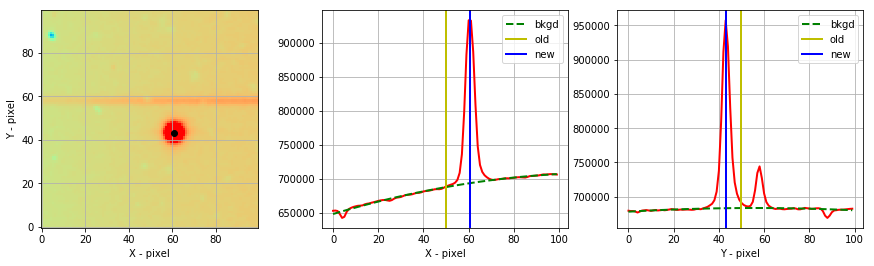

2018-03-09 11:57:29  Image      find_target          INFO   
	X,Y target position in pixels: 766.522,663.101
2018-03-09 11:57:29  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-09 11:57:29  Spectrum   __init__             INFO   
	Spectrum info copied from Image


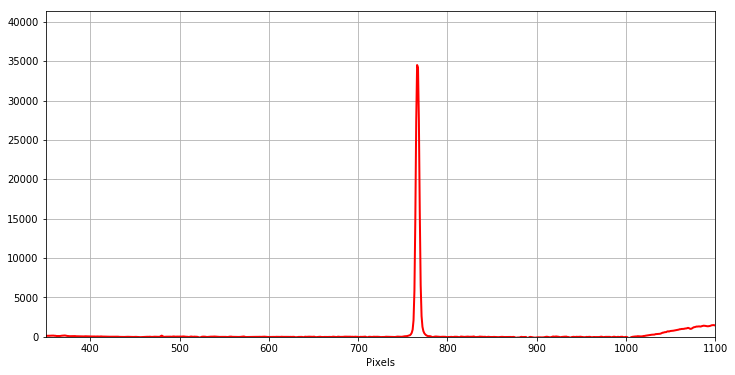

2018-03-09 11:57:29  Spectrum   calibrate            WARNING 
	Manual settings for tests
2018-03-09 11:57:29  Spectrum   calibrate            INFO   
	Calibrating order 1 spectrum...


   Line   Tabulated Detected  Shift     FWHM  Amplitude   SNR  
              nm       nm       nm       nm                    
--------- --------- -------- -------- ------- --------- -------
$Ca_{II}$   393.366  386.274 -7.09229 16.2985  -59.7882 4.64736
$Ca_{II}$   396.847  391.862 -4.98498 4.07699    -55.73 4.33192
$H\gamma$   502.719  505.179  2.46001 12.9514   582.979 10.2386
$He_{II}$   542.798  530.742 -12.0555   23.55   444.526 7.80697
 $H\beta$     563.3  566.785  3.48449 7.91456    1350.9 23.7252
$O_{III}$    579.98  579.648 -0.33195 12.6193   443.368 7.78664
 $He_{I}$   680.524   683.68   3.1562 9.56941   122.321 5.75912
    $O_2$     762.1   751.08 -11.0203 5.99343   -272.55 5.84532
$H\alpha$   760.218  761.817  1.59939 20.4491   1883.01 40.3845
 $C_{IV}$   817.787  814.007 -3.78059 5.30065   72.7174 9.52568
 $C_{II}$   823.579  820.035 -3.54377 9.08116   169.454 22.1977
 $O_2(Z)$   822.696  825.641  2.94535   23.55   -377.86 49.4982
 $C_{II}$   838.058  828.922 -9.13627 14

2018-03-09 11:57:49  Spectrum   calibrate            INFO   
	Wavelenght total shift: 0.74nm (after 6 steps)
	with D = 55.45 mm (DISTANCE2CCD = 55.45 +/- 0.19 mm, -0.0 sigma shift)


   Line   Tabulated Detected   Shift     FWHM  Amplitude   SNR  
              nm       nm        nm       nm                    
--------- --------- -------- --------- ------- --------- -------
$Ca_{II}$   393.366   387.62  -5.74633 13.5918  -76.0804 4.88072
$H\gamma$   502.719   503.51  0.790389 12.8975   582.909 10.2384
$He_{II}$   542.798  528.995  -13.8031   23.55   444.248 7.80292
 $H\beta$     563.3  564.929   1.62879 7.89013   1351.05 23.7304
$O_{III}$    579.98  577.754  -2.22679  12.589    443.64 7.79224
 $He_{I}$   680.524  684.712   4.18793 16.8342   150.092 8.97401
 $O_2(B)$   686.719  689.398   2.67872 8.35521  -113.099 6.76217
$H\alpha$   760.218  759.714 -0.503647 18.9343   1875.65 29.0355
 $C_{II}$   823.579  823.009 -0.570468 6.41679   90.2181   6.291
 $O_2(Z)$   822.696  823.009  0.312561 5.21284  -92.0748 6.42047
 $O_2(Y)$   898.765  896.704  -2.06103 3.53604  -58.7979 3.69018
  $H_2 O$     950.0   945.83  -4.16993 3.27938  -101.922 5.37796
  $H_2 O$     970.0  970.

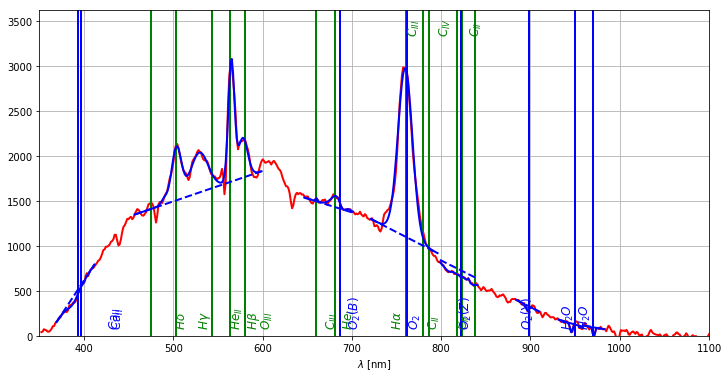

2018-03-09 11:57:52  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./outputs/trim_20170605_007_spectrum.fits


In [5]:
parameters.DEBUG=True
Spectractor(filename,output_directory,guess,target)

### Image and Spectrum classes

The Image and Spectrum classes have methods to load, save and plot images/spectra, and specific methods to extract the spectrum from the image. For instance, to load and plot the output spectrum, one can use:

2018-03-09 11:57:52  Spectrum   load_spectrum        INFO   
	Spectrum loaded from ./outputs/trim_20170605_007_spectrum.fits


MAIN_ID       RA           DEC      RA_PREC ... SP_TYPE_4 SP_QUAL_4 SP_BIBCODE_4
           "h:m:s"       "d:m:s"            ...                                 
------- ------------- ------------- ------- ... --------- --------- ------------
 3C 273 12 29 06.6951 +02 03 08.662       9 ...                                 
Loading target 3C273 from NED...


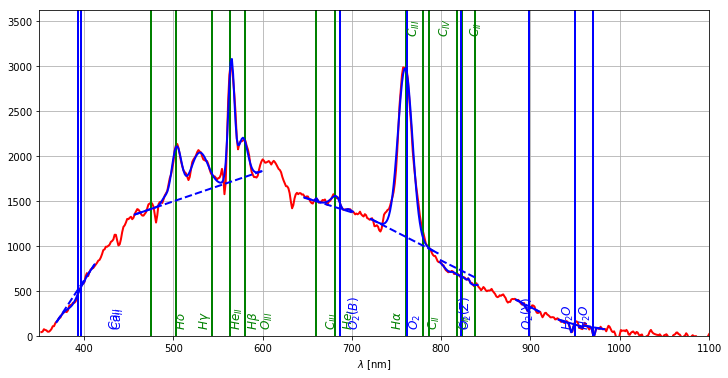

In [6]:
spec = Spectrum('./outputs/trim_20170605_007_spectrum.fits')
spec.plot_spectrum()

### Spectractor settings

Some settings parameters are defined in the XWINDOW python file. For instance the half-width (in pixel) of the search windows to find the object in the images are set by:

In [7]:
print 'Width of search window along X in pixels:',parameters.XWINDOW
print 'Width of search window along Y in pixels:',parameters.YWINDOW

Width of search window along X in pixels: 100
Width of search window along Y in pixels: 100


and in the rotated images by:

In [8]:
print 'Width of search window along X in pixels:',parameters.XWINDOW_ROT
print 'Width of search window along Y in pixels:',parameters.YWINDOW_ROT

Width of search window along X in pixels: 50
Width of search window along Y in pixels: 50


The edges of the output spectrum are floats specified by the LAMBDA_MIN and LAMBDA_MAX parameters (in nanometers):

In [9]:
print 'Minimum wavelenght:',parameters.LAMBDA_MIN,'nm'
print 'Maximum wavelenght:',parameters.LAMBDA_MAX,'nm'

Minimum wavelenght: 350 nm
Maximum wavelenght: 1100 nm
